# import

In [ ]:
import numpy as np # numpy.py 안에 있는 함수를 이용
import pandas as pd 
import matplotlib.pyplot as plt # matplotlib - pyplot.py 안에 있는 함수를 이용
import seaborn as sns

# 미국 신생아 이름 데이터 셋

* 1880 ~ 2010년 연도별로 txt 파일이 만들어져 있음.
* 각 파일에는 '이름, 성별, 신생아 수' 가 comma(,)로 부분되어 있음. (.csv)

In [ ]:
file_path= 'https://raw.githubusercontent.com/wesm/pydata-book/3rd-edition/datasets/babynames/yob1880.txt'

`pd.read_csv()` 함수는 파일의 첫번째 줄을 데이터 프레임의 컬럼 이름으로 취급(Default)

csv 파일에 컬럼 이름이 포함되어 있지 않은 경우, 첫번째 줄을 컬럼으로 인식.
* 컬럼 이름들을 함수의 arg로 전달해야 함.

In [ ]:
yob1880 = pd.read_csv(file_path, names=['name', 'gender', 'births'])

In [ ]:
yob1880.head()

,name,gender,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


In [ ]:
yob1880.tail()

,name,gender,births
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5
1999,Zachariah,M,5


각 txt 파일을 읽어서 만들어진 연도별 데이터 프레임들을 저장하는 리스트를 생성

In [ ]:
baby = []

In [ ]:
col_names = ['name', 'gender', 'births']

yobs = []
for x in range(1880,2011):
    file_path= f'https://raw.githubusercontent.com/wesm/pydata-book/3rd-edition/datasets/babynames/yob{x}.txt'
    df = pd.read_csv(file_path, names = col_names)
    df['year'] = x
    yobs.append(df)

In [ ]:
len(yobs)

131

In [ ]:
yobs[0].head()

,name,gender,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [ ]:
yobs[0].tail()

,name,gender,births,year
1995,Woodie,M,5,1880
1996,Worthy,M,5,1880
1997,Wright,M,5,1880
1998,York,M,5,1880
1999,Zachariah,M,5,1880


In [ ]:
yobs[-1]

,name,gender,births,year
0,Isabella,F,22731,2010
1,Sophia,F,20477,2010
2,Emma,F,17179,2010
3,Olivia,F,16860,2010
4,Ava,F,15300,2010
...,...,...,...,...
33833,Zymaire,M,5,2010
33834,Zyonne,M,5,2010
33835,Zyquarius,M,5,2010
33836,Zyran,M,5,2010


## 리스트에 있는 131개의 데이터 프레임을 하나의 데이터 프레임으로 변환(concat())

In [ ]:
df = pd.concat(yobs, ignore_index =True)
#param ignore_index : 데이터 프레임을 합칠 대 인덱스를 무시할지, 말지를 설정 (Default = False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1690784 entries, 0 to 1690783
Data columns (total 4 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   name    1690784 non-null  object
 1   gender  1690784 non-null  object
 2   births  1690784 non-null  int64 
 3   year    1690784 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 51.6+ MB


In [ ]:
df.head()

,name,gender,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [ ]:
df.tail()

,name,gender,births,year
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010
1690783,Zzyzx,M,5,2010


In [ ]:
df.loc[0]

name      Mary
gender       F
births    7065
year      1880
Name: 0, dtype: object

#ex 

In [ ]:
birth_by_year = df.groupby('year').births.sum()

print(birth_by_year)

year
1880     201486
1881     192703
1882     221538
1883     216954
1884     243466
         ...   
2006    3946702
2007    3986130
2008    3915955
2009    3801002
2010    3657392
Name: births, Length: 131, dtype: int64


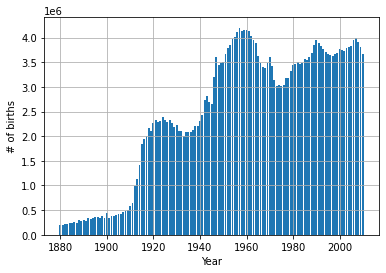

In [ ]:
# 연도별 신생아 수, 시각화
plt.bar(x=birth_by_year.index, height=birth_by_year.values)

plt.grid()
plt.xlabel('Year')
plt.ylabel('# of births')
plt.show()

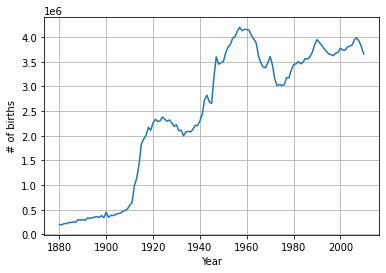

In [ ]:
plt.plot(birth_by_year.index,birth_by_year.values)

plt.grid()
plt.xlabel('Year')
plt.ylabel('# of births')
plt.show()

In [ ]:
# 연도별 성별 신생아 수, 시각화
births_by_year_gender = df.groupby(['year', 'gender']).births.sum()

births_by_year_gender # multi-level index를 갖는 series

year  gender
1880  F           90993
      M          110493
1881  F           91955
      M          100748
1882  F          107851
                 ...   
2008  M         2032310
2009  F         1827643
      M         1973359
2010  F         1759010
      M         1898382
Name: births, Length: 262, dtype: int64

In [ ]:
# multi-level index를 데이터프레임의 컬럼으로 변환 : .reset_index()
births_df = births_by_year_gender.reset_index()

In [ ]:
births_female = births_df[births_df.gender == 'F']
births_male = births_df[births_df.gender == 'M']

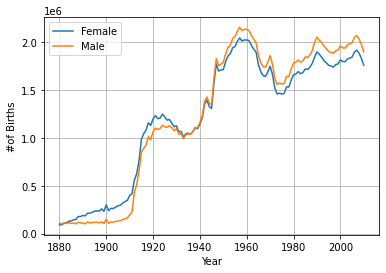

In [ ]:
plt.plot(births_female.year, births_female.births, label='Female')
plt.plot(births_male.year, births_male.births, label='Male')

plt.legend()
plt.grid()
plt.xlabel('Year')
plt.ylabel('#of Births')
plt.show()

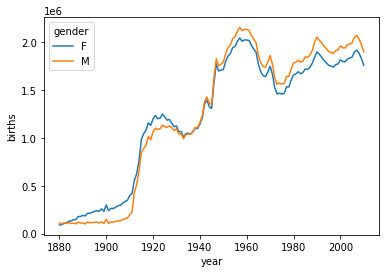

In [ ]:
sns.lineplot(data = df, x='year', y='births', hue='gender', estimator=np.sum, err_style=None)
plt.show()